# Dataset

This case requires to develop a customer segmentation to define marketing strategy. The
sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.
https://www.kaggle.com/datasets/arjunbhasin2013/ccdata

It consist of:

 
 - CUSTID : Identification of Credit Card holder (Categorical)

 - BALANCE : Balance amount left in their account to make purchases (

 - BALANCEFREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 =                  frequently   updated, 0 = not frequently updated)

 - PURCHASES : Amount of purchases made from account

 - ONEOFFPURCHASES : Maximum purchase amount done in one-go

 - INSTALLMENTSPURCHASES : Amount of purchase done in installment

 - CASHADVANCE : Cash in advance given by the user

 - PURCHASESFREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 =      frequently purchased, 0 = not frequently purchased)

 - ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently       purchased, 0 = not frequently purchased)

 - PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 =     frequently done,
  0 = not   frequently done)

 - CASHADVANCEFREQUENCY : How frequently the cash in advance being paid

 - CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"

 - PURCHASESTRX : Numbe of purchase transactions made

 - CREDITLIMIT : Limit of Credit Card for user

 - PAYMENTS : Amount of Payment done by user

 - MINIMUM_PAYMENTS : Minimum amount of payments made by user

 - PRCFULLPAYMENT : Percent of full payment paid by user

 - TENURE : Tenure of credit card service for user

# Aim

The aim of this project is to apply unsupervised learning techniques to Cluster the customers  And choose the best Algorithem to do that.
Then choose which offer from list of offers suitable for each cluster. 

# Importing libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.mixture import GaussianMixture
from sklearn.manifold import TSNE
%matplotlib inline
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.impute import KNNImputer
warnings.filterwarnings(action="ignore")
pd.options.display.max_rows = 10000

# Reading Data

In [2]:
# Read data and print shape
df = pd.read_csv('CC GENERAL.csv')
df_ = df.copy() 

In [3]:
df_.head(5)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


# Feature Engineering

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
df_.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [6]:
df_.isnull().sum().sort_values(ascending=False)

MINIMUM_PAYMENTS                    313
CREDIT_LIMIT                          1
CUST_ID                               0
BALANCE                               0
PRC_FULL_PAYMENT                      0
PAYMENTS                              0
PURCHASES_TRX                         0
CASH_ADVANCE_TRX                      0
CASH_ADVANCE_FREQUENCY                0
PURCHASES_INSTALLMENTS_FREQUENCY      0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_FREQUENCY                   0
CASH_ADVANCE                          0
INSTALLMENTS_PURCHASES                0
ONEOFF_PURCHASES                      0
PURCHASES                             0
BALANCE_FREQUENCY                     0
TENURE                                0
dtype: int64

In [7]:
df_.duplicated().sum()
print(df_.duplicated().value_counts()) 

False    8950
dtype: int64


In [7]:
#check how many object tybe do we have 
cat_col = df_.select_dtypes(include=['object']).columns
print(cat_col)

Index(['CUST_ID'], dtype='object')


In [8]:
#exclude this column
num_col = df_.select_dtypes(exclude=['object']).columns
print(num_col)

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')


In [10]:
df_[num_col].corr()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.322412,0.181261,0.164350,0.126469,0.496692,-0.077944,0.073166,-0.063186,0.449218,0.385152,0.154338,0.531283,0.322802,0.398684,-0.318959,0.072692
BALANCE_FREQUENCY,0.322412,1.000000,0.133674,0.104323,0.124292,0.099388,0.229715,0.202415,0.176079,0.191873,0.141555,0.189626,0.095843,0.065008,0.132569,-0.095082,0.119776
PURCHASES,0.181261,0.133674,1.000000,0.916845,0.679896,-0.051474,0.393017,0.498430,0.315567,-0.120143,-0.067175,0.689561,0.356963,0.603264,0.093860,0.180379,0.086288
ONEOFF_PURCHASES,0.164350,0.104323,0.916845,1.000000,0.330622,-0.031326,0.264937,0.524891,0.127729,-0.082628,-0.046212,0.545523,0.319724,0.567292,0.048755,0.132763,0.064150
INSTALLMENTS_PURCHASES,0.126469,0.124292,0.679896,0.330622,1.000000,-0.064244,0.442418,0.214042,0.511351,-0.132318,-0.073999,0.628108,0.256499,0.384084,0.132172,0.182569,0.086143
CASH_ADVANCE,0.496692,0.099388,-0.051474,-0.031326,-0.064244,1.000000,-0.215507,-0.086754,-0.177070,0.628522,0.656498,-0.075850,0.303985,0.453238,0.140107,-0.152935,-0.068312
PURCHASES_FREQUENCY,-0.077944,0.229715,0.393017,0.264937,0.442418,-0.215507,1.000000,0.501343,0.862934,-0.308478,-0.203478,0.568430,0.119788,0.103464,0.003030,0.305802,0.061506
ONEOFF_PURCHASES_FREQUENCY,0.073166,0.202415,0.498430,0.524891,0.214042,-0.086754,0.501343,1.000000,0.142329,-0.111716,-0.069088,0.544869,0.295038,0.243537,-0.030327,0.157531,0.082466
PURCHASES_INSTALLMENTS_FREQUENCY,-0.063186,0.176079,0.315567,0.127729,0.511351,-0.177070,0.862934,0.142329,1.000000,-0.262958,-0.169207,0.529975,0.060755,0.085551,0.030073,0.250087,0.073275
CASH_ADVANCE_FREQUENCY,0.449218,0.191873,-0.120143,-0.082628,-0.132318,0.628522,-0.308478,-0.111716,-0.262958,1.000000,0.799561,-0.131168,0.132616,0.183192,0.098838,-0.249773,-0.133372


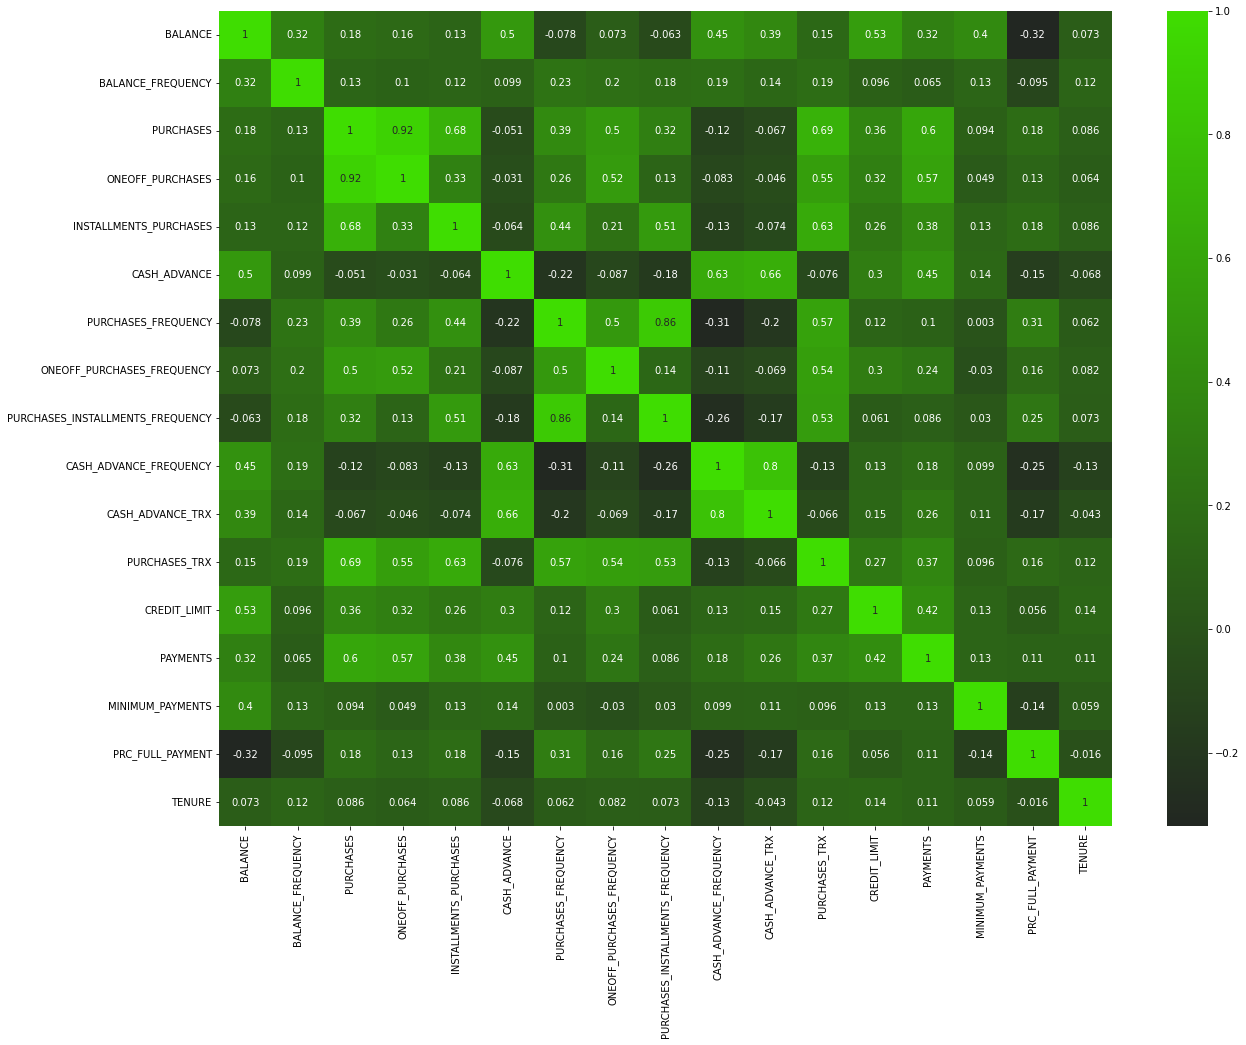

In [11]:
plt.figure(figsize=(20,15))
cmap = sns.dark_palette("#3fdd01", as_cmap=True)
map = sns.heatmap(df_[num_col].corr(),annot=True,cmap=cmap)

In [12]:
# plt.figure(figsize=(15,12))
# cmap = sns.light_palette("#3fdd01", as_cmap=True)
# map = sns.heatmap(df_[num_col].corr(),annot=True,cmap=cmap)

In [13]:
# plt.subplots(figsize=(20,15))
# sns.heatmap(df_[num_col].corr(),annot = True);

array([[<AxesSubplot:title={'center':'BALANCE'}>,
        <AxesSubplot:title={'center':'BALANCE_FREQUENCY'}>,
        <AxesSubplot:title={'center':'PURCHASES'}>,
        <AxesSubplot:title={'center':'ONEOFF_PURCHASES'}>],
       [<AxesSubplot:title={'center':'INSTALLMENTS_PURCHASES'}>,
        <AxesSubplot:title={'center':'CASH_ADVANCE'}>,
        <AxesSubplot:title={'center':'PURCHASES_FREQUENCY'}>,
        <AxesSubplot:title={'center':'ONEOFF_PURCHASES_FREQUENCY'}>],
       [<AxesSubplot:title={'center':'PURCHASES_INSTALLMENTS_FREQUENCY'}>,
        <AxesSubplot:title={'center':'CASH_ADVANCE_FREQUENCY'}>,
        <AxesSubplot:title={'center':'CASH_ADVANCE_TRX'}>,
        <AxesSubplot:title={'center':'PURCHASES_TRX'}>],
       [<AxesSubplot:title={'center':'CREDIT_LIMIT'}>,
        <AxesSubplot:title={'center':'PAYMENTS'}>,
        <AxesSubplot:title={'center':'MINIMUM_PAYMENTS'}>,
        <AxesSubplot:title={'center':'PRC_FULL_PAYMENT'}>],
       [<AxesSubplot:title={'center':'TENURE'

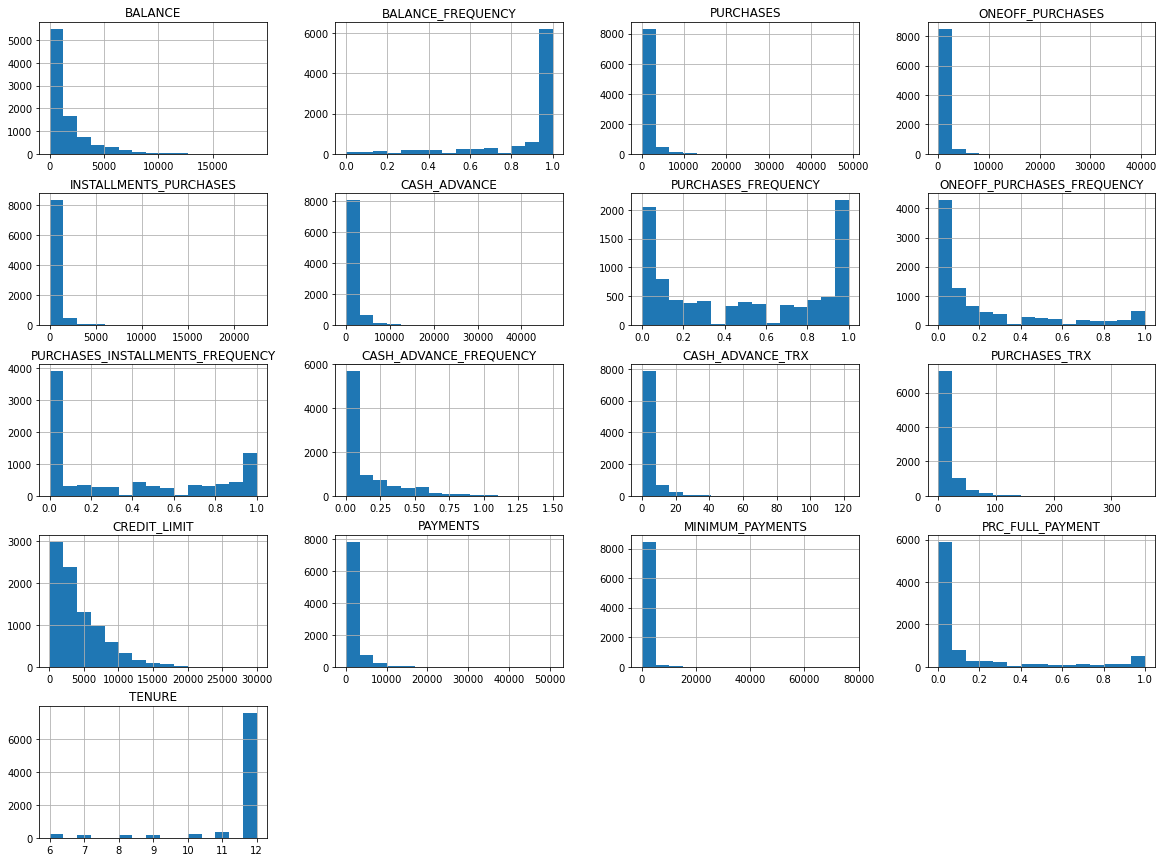

In [14]:
df_[num_col].hist(bins=15, figsize=(20, 15), layout=(5, 4))

# Handle Missing Values

In [9]:
#The idea in kNN methods is to identify ‘k’ samples in the dataset that are similar or
#close in the space. Then we use these ‘k’ samples to estimate the value of the missing
#data point
# Each sample’s missing values are imputed using the mean value of the ‘k’-neighbors
#found in the dataset.

imputer = KNNImputer()
imp_data = pd.DataFrame(imputer.fit_transform(df_[num_col]),columns=df_[num_col].columns)
imp_data.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [10]:

scalar = StandardScaler()
scaled_data = scalar.fit_transform(imp_data)

df_1 = pd.DataFrame(scaled_data, columns = imp_data.columns)

df_1.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960336,-0.528979,-0.303812,-0.525551,0.36068
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688696,0.818642,0.093556,0.234227,0.36068
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826116,-0.383805,-0.096029,-0.525551,0.36068
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826116,-0.598688,-0.201440,-0.525551,0.36068
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905368,-0.364368,-0.258964,-0.525551,0.36068


# K-Means Clustering

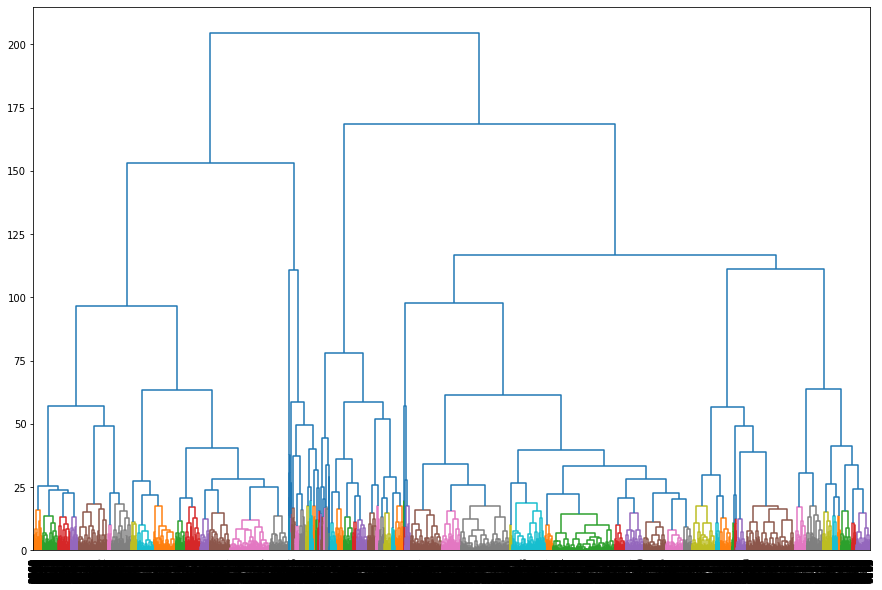

In [17]:
plt.figure(figsize = (15,10))
dendrogram(linkage(df_1,method = 'ward'),leaf_rotation = 90, p = 5, color_threshold= 20, leaf_font_size=10, truncate_mode = 'none')
plt.show()

In [7]:
dff = df_.copy()
data_model  = dff.drop(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
        'TENURE','PURCHASES_TRX','CASH_ADVANCE_TRX'], axis=1)


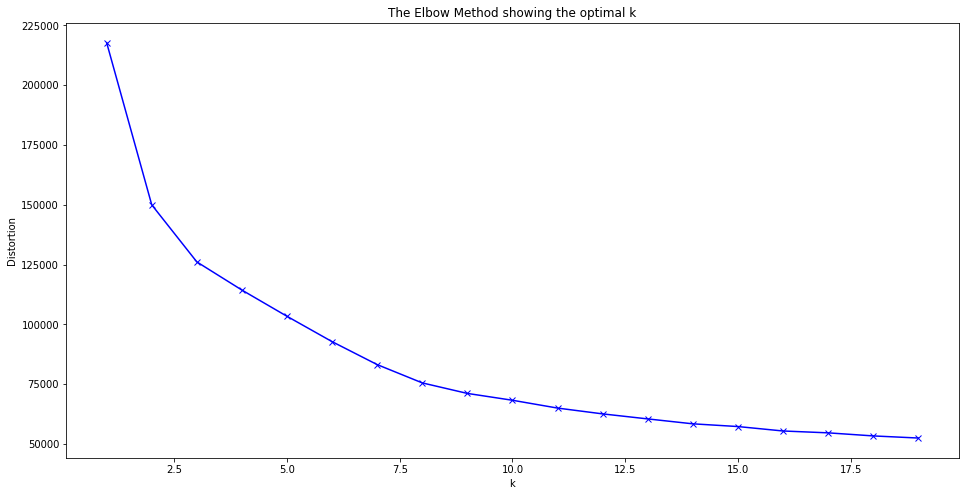

In [45]:
distortions = []
K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_1)
    distortions.append(kmeanModel.inertia_)
    
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [8]:
kmeanModel = KMeans(n_clusters = 8, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
kmeanModel.fit(df_1)
#predict the labels of clusters.
label = kmeanModel.fit_predict(df_1)
#Getting unique labels
data_model['Cluster']       = label
df_1              = pd.DataFrame(df_1)
df_1['Cluster']   = label

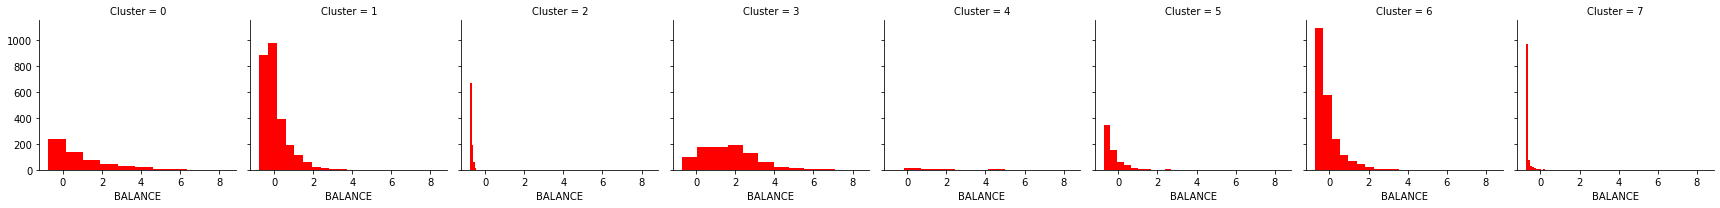

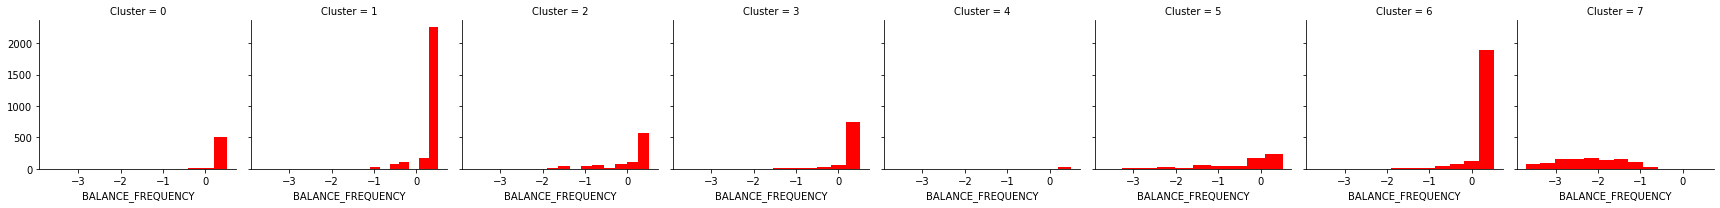

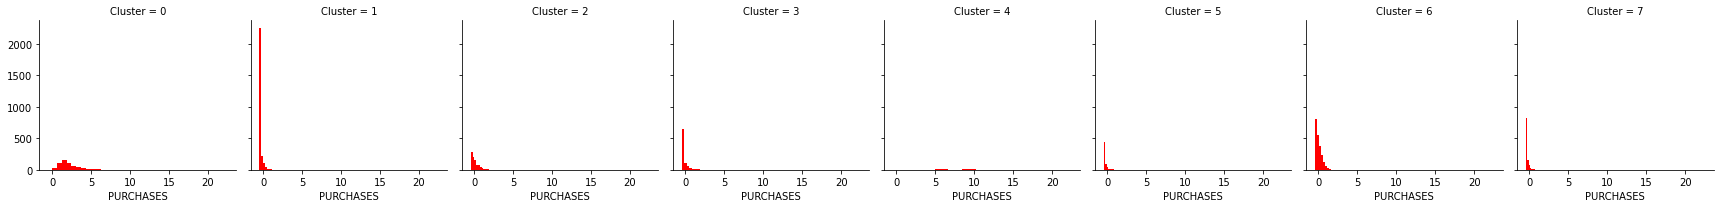

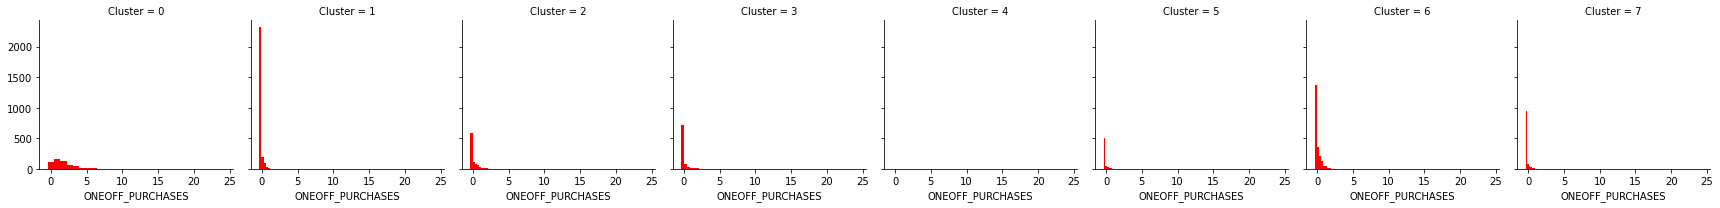

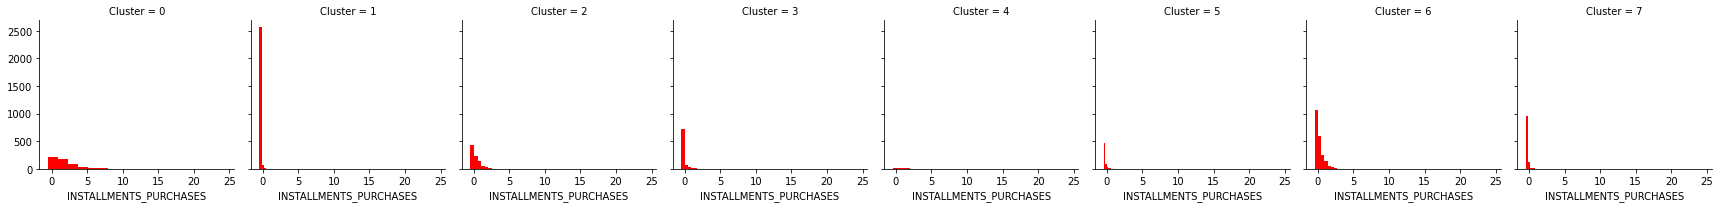

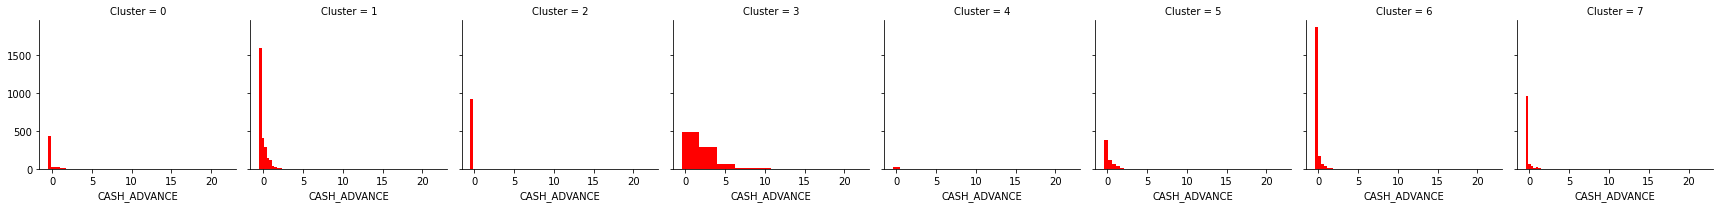

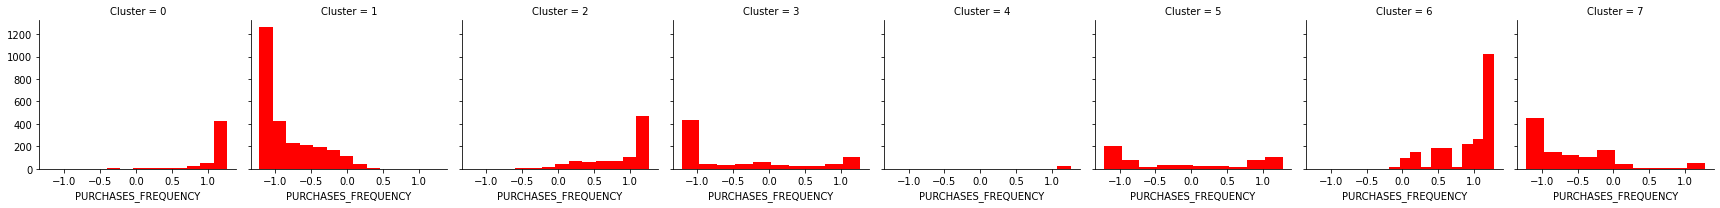

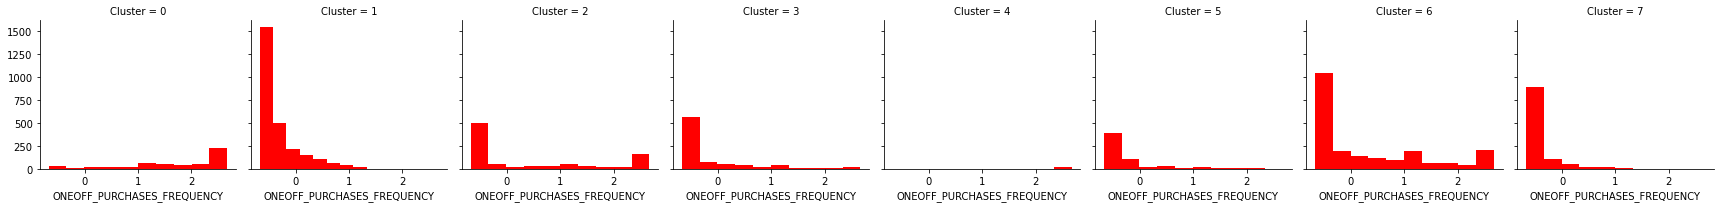

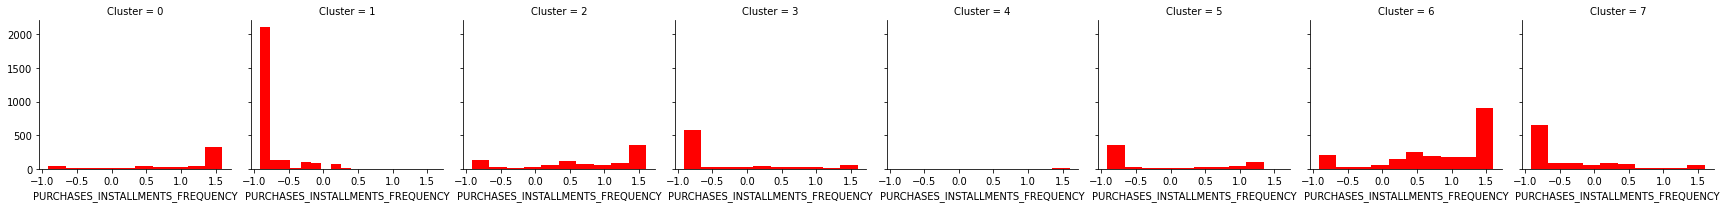

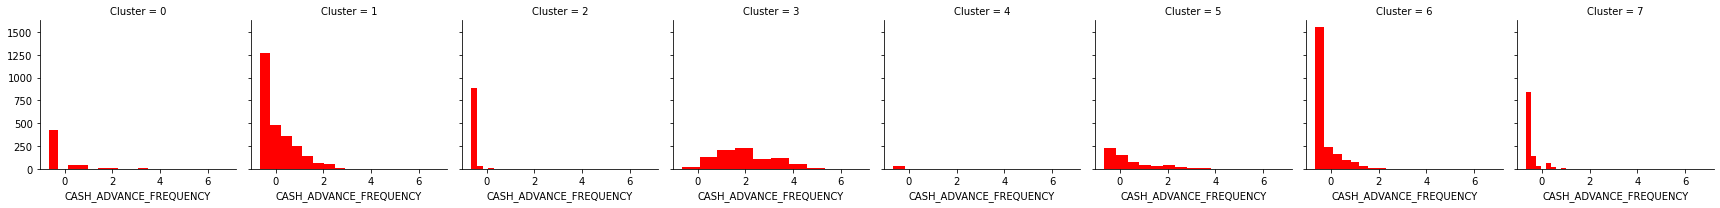

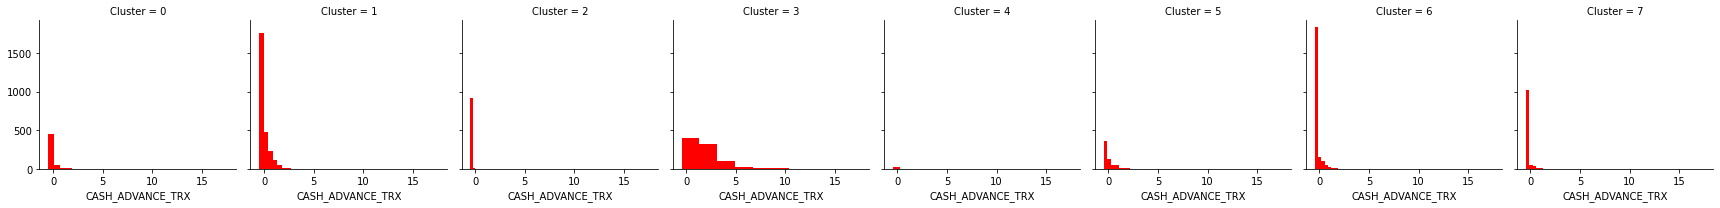

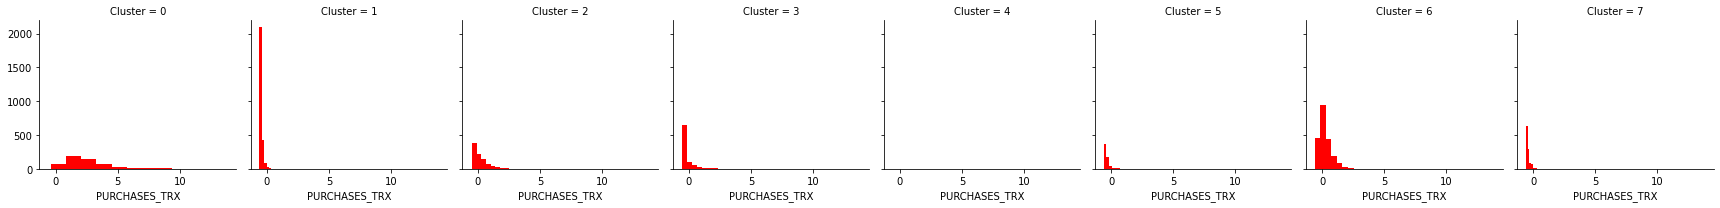

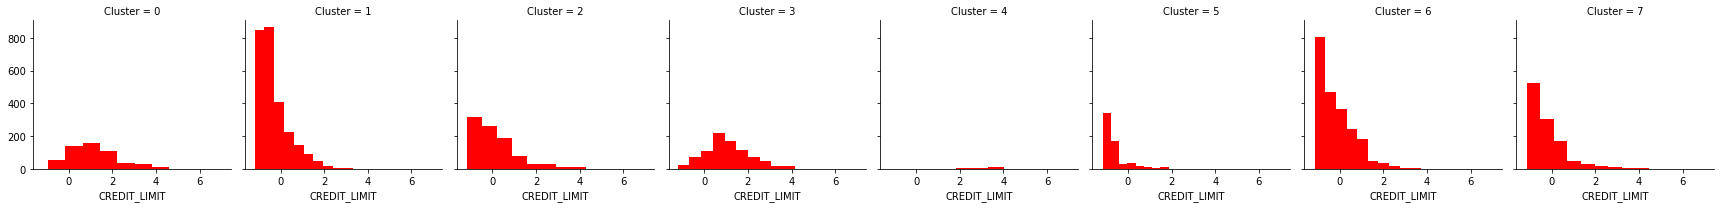

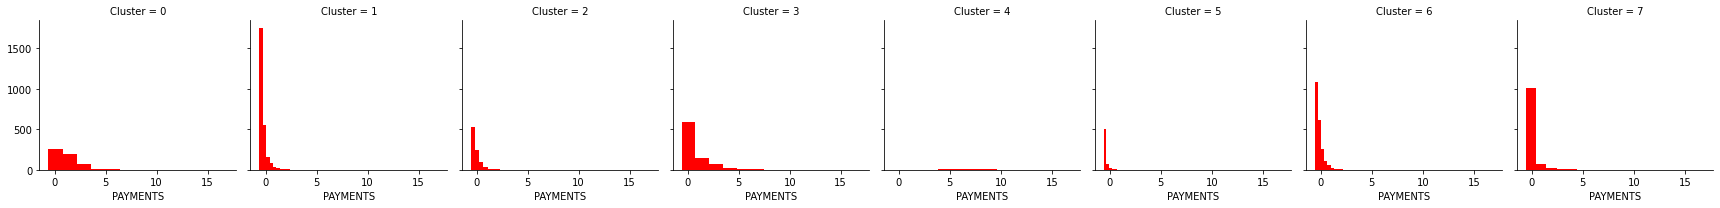

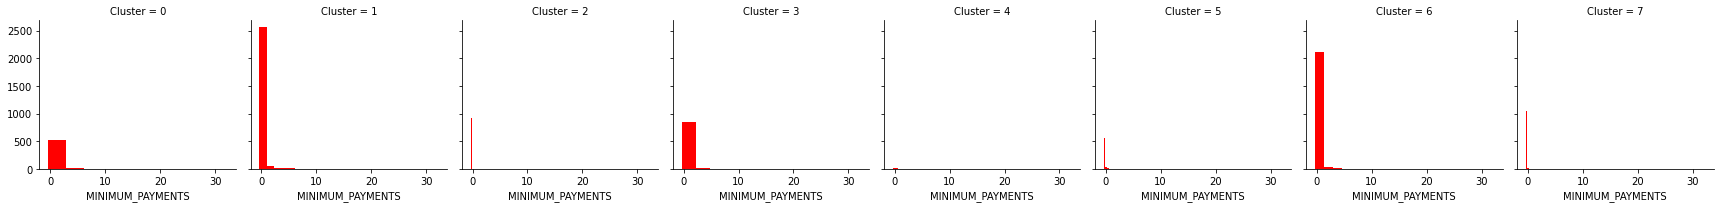

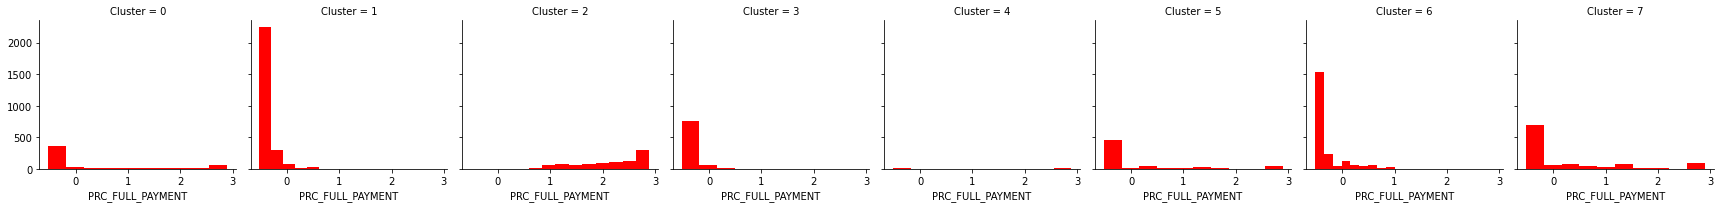

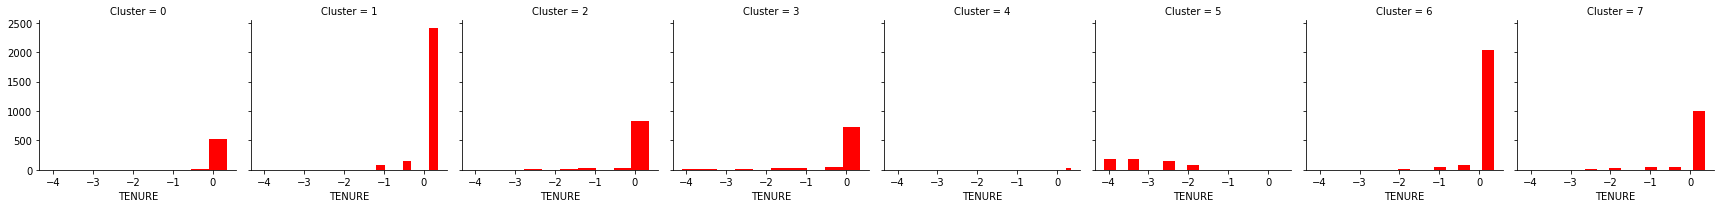

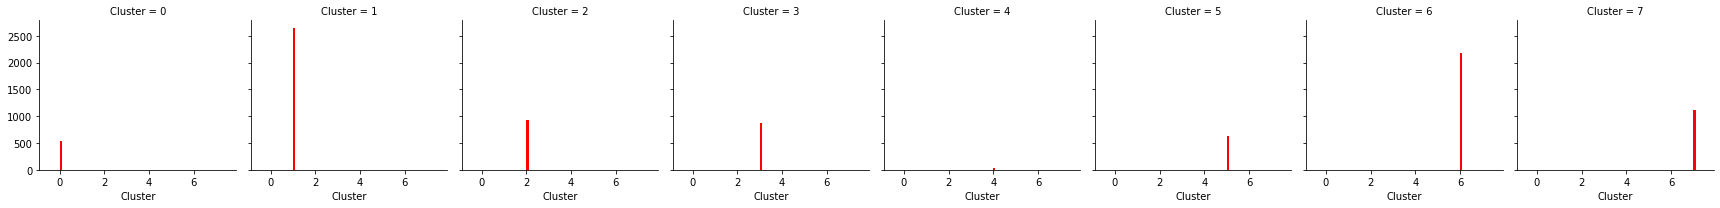

In [21]:
for c in df_1:
    g   = sns.FacetGrid(df_1, col='Cluster')
    g.map(plt.hist, c, color = "red")

In [9]:
#df_1["Cluster"].replace({3: 1, 2: 0, 5:4}, inplace=True)
data_model["Cluster"].replace({3: 1, 2: 0, 5:4}, inplace=True)
df_1["Cluster"].replace({3: 1, 2: 0, 5:4}, inplace=True)
clusters_   = data_model["Cluster"]
#clusters_   = df_1["Cluster"]

Text(0, 0.5, 'Cumulative Variance Explained')

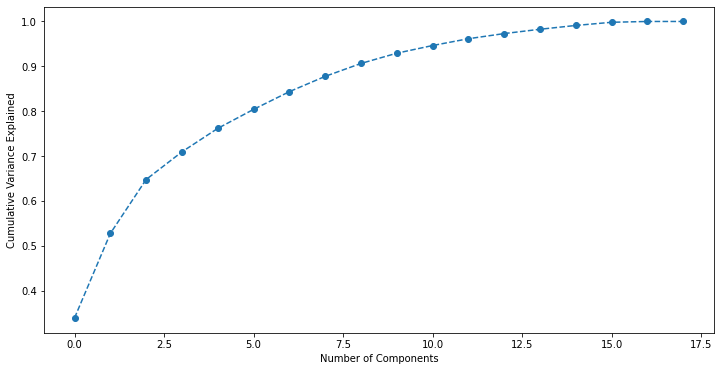

In [37]:
from sklearn.decomposition import PCA
import random

random.seed(32)
pca = PCA()
pca.fit(df_1)
fig = plt.figure(figsize =(12,6))
plt.plot(range(0,18),pca.explained_variance_ratio_.cumsum(), marker ='o', linestyle = "--")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Variance Explained")

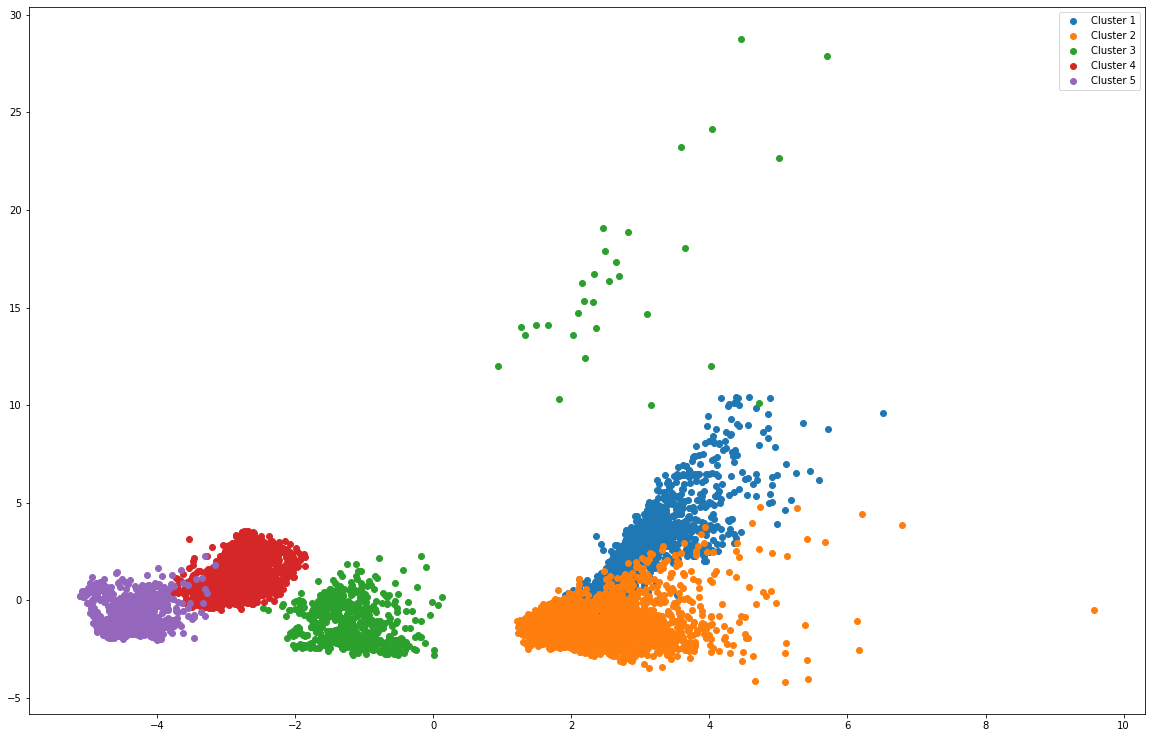

In [40]:
pca = PCA(n_components = 3)
pca.fit(df_1)

scores = pca.transform(df_1)

x,y = scores[:,0] , scores[:,1]
df_data = pd.DataFrame({'x': x, 'y':y, 'clusters':clusters_})
grouping_ = df_data.groupby('clusters')
fig, ax = plt.subplots(figsize=(20, 13))

names = {0: 'Cluster 1', 
         1: 'Cluster 2', 
         4: 'Cluster 3',
         6: 'Cluster 4',
         7: 'Cluster 5'}

for name, grp in grouping_:
    ax.plot(grp.x, grp.y, marker='o', label = names[name], linestyle='')
    ax.set_aspect('auto')

ax.legend()
plt.show()

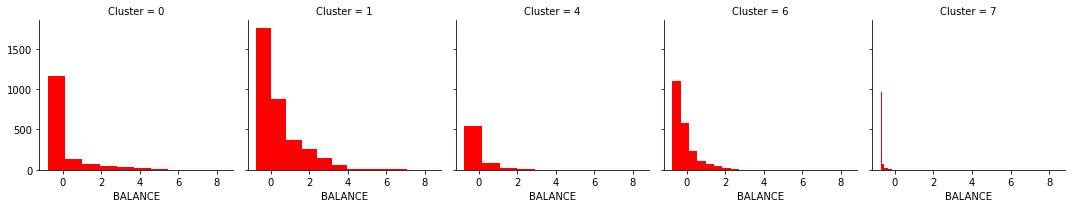

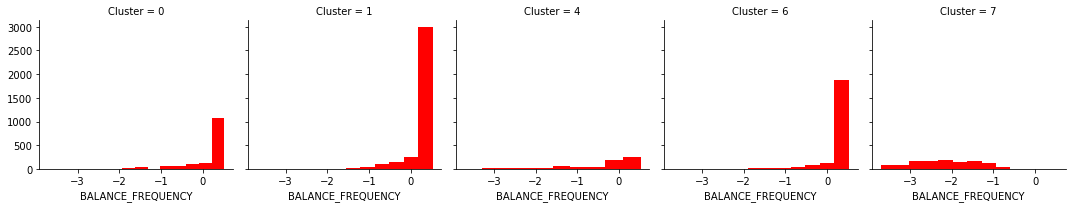

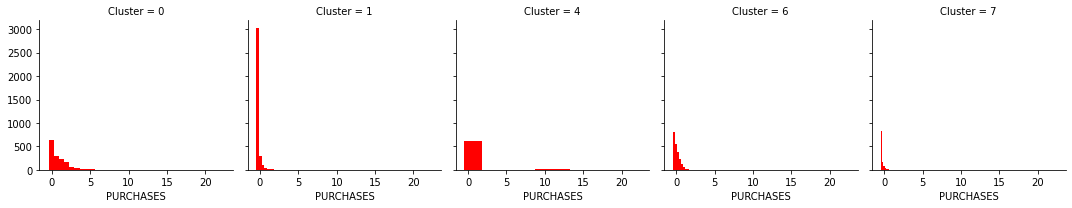

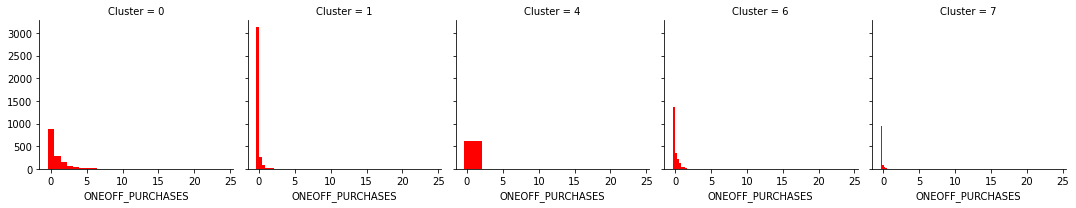

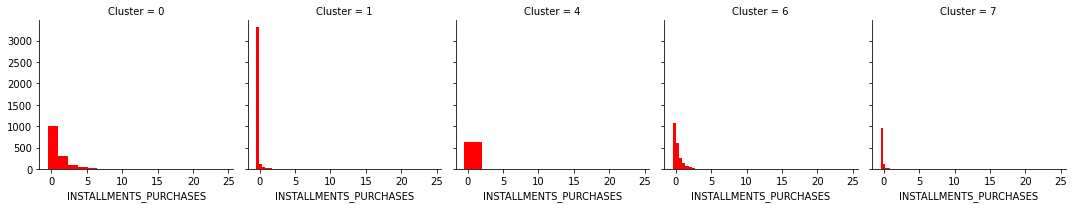

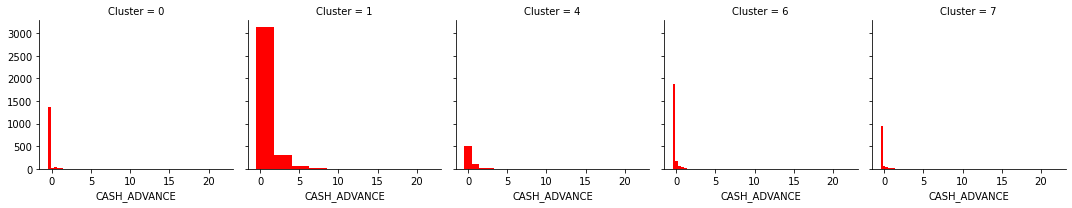

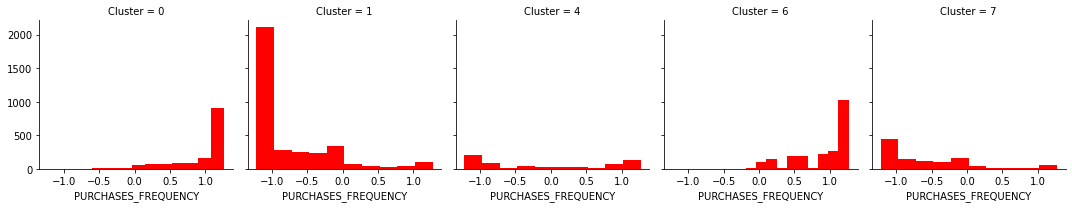

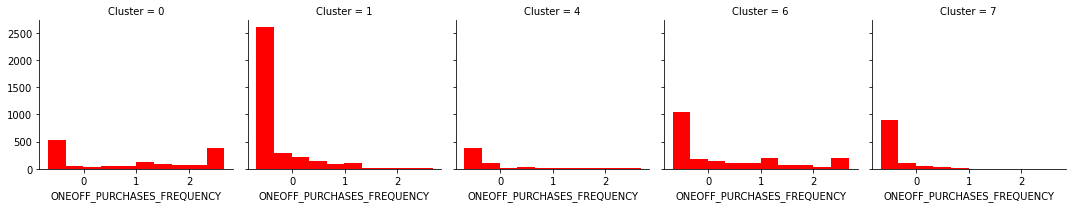

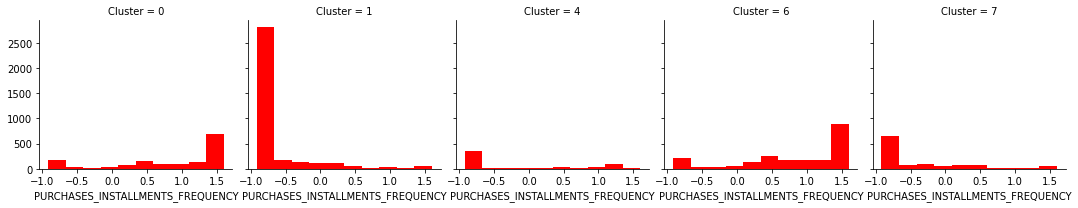

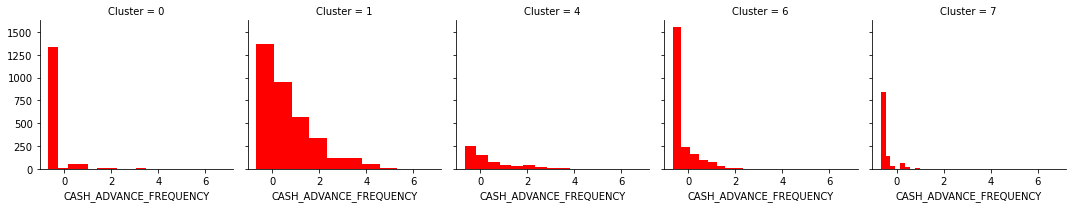

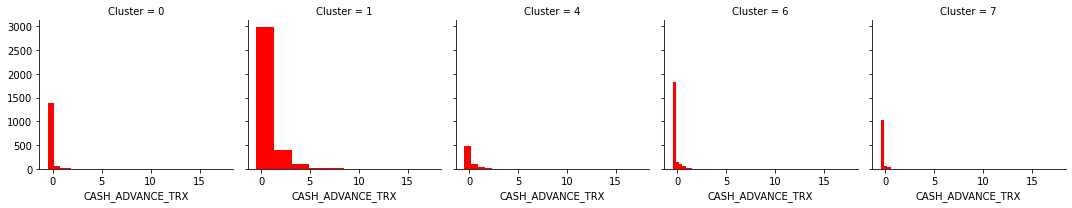

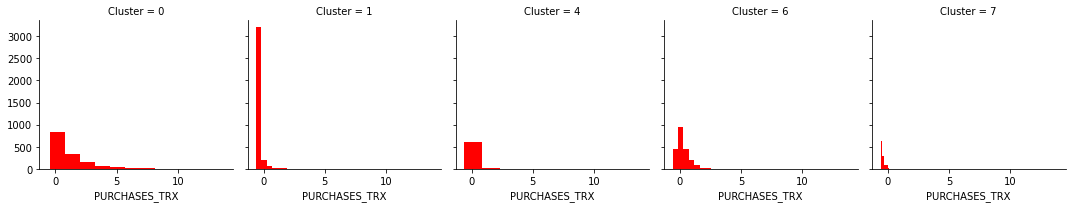

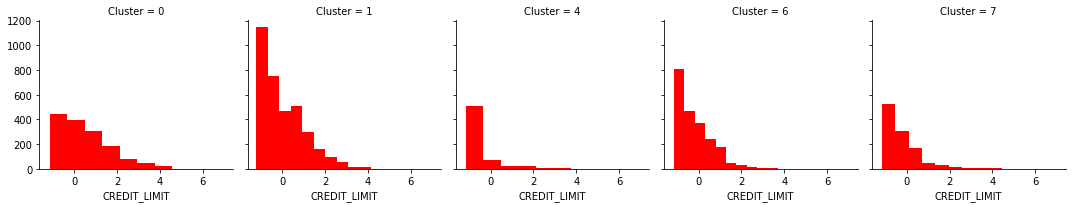

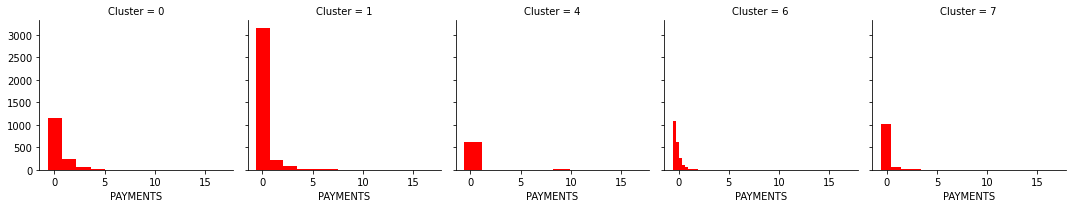

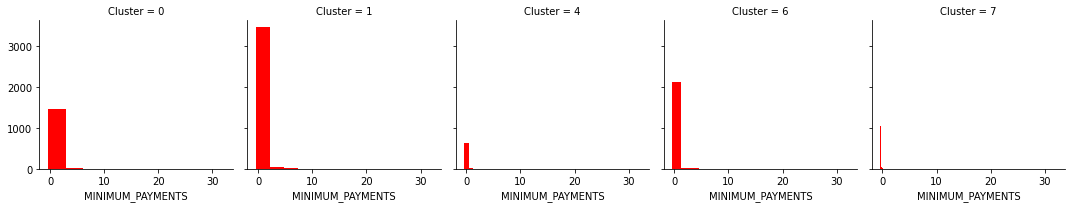

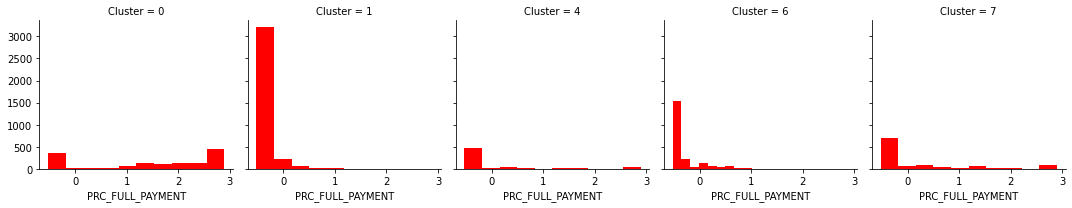

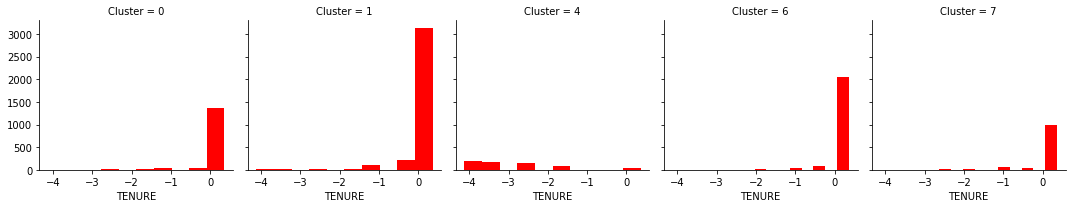

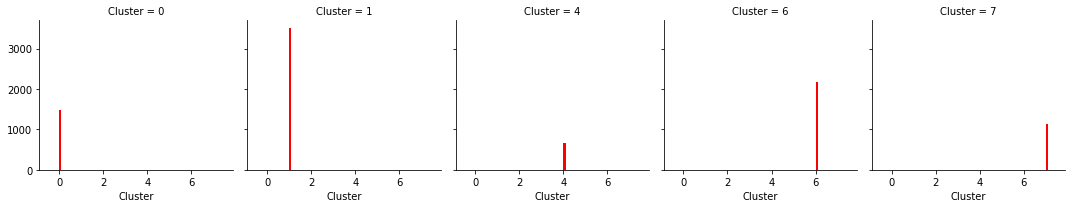

In [43]:
#fig  = plt.figure(figsize = (7200,30))
for c in df_1:
    g   = sns.FacetGrid(df_1, col='Cluster')
    g.map(plt.hist, c, color = "red")

##  Cluster 0
1. less TENURE
2. not good purchase 
3. good credit limit.
4. miss payments
5. long cridit limit

##  Cluster 1
1. long cridit limit
2. not good purchase 
3. good credit limit.
4. better payments
5. good balance

##  Cluster 4
1. less TENURE
2. not good purchase 
3. good credit limit.
4. bad payments
5. bad balance


##  Cluster 6
1. long cridit limit
2. not good purchase 
3. good credit limit.
4. better payments
5. good balance


##  Cluster 7
1. long cridit limit
2. good purchase 
3. good credit limit.
4. bad payments
5. bad balance

In [ ]:
density = model.score_samples(df_1)
density_threshold = np.percentile(density,4)
#cc1['cluster']=clusters
df_1['Anamoly'] = density<density_threshold
cc1

# As we see the cluster does now work here.

In [12]:
for i in range(3):
    gm = GaussianMixture(
                     n_components = i+1,
                     n_init = 10,
                     max_iter = 100)
    gm.fit(df_1)

In [13]:
# Anomalous points are those that are in low-density region Or where density is in
#low-percentile of 4%

#score_samples() method gives score or density of a point at any location.
densities = gm.score_samples(df_1)

densities

density_threshold = np.percentile(densities,4)
density_threshold

anomalies = df_1[densities < density_threshold]
anomalies
anomalies.shape 

(358, 17)

In [14]:
unanomalies = df_1[densities >= density_threshold]
unanomalies
unanomalies.shape 

(8592, 17)

In [ ]:
# #Getting unique labels
# plt.figure(figsize = (15,10))
# u_labels = np.unique(label)
 
# #plotting the results:
# x = df_1.values
# for i in u_labels:
#     plt.scatter(x[label == i , 0] , x[label == i , 1] , label = i)
# plt.legend()
# plt.show()
# from sklearn.decomposition import PCA
# pca = PCA(n_components = 2)
# principal_comp = pca.fit_transform(df_1)
# pca_df = pd.DataFrame.from_records(data = principal_comp, columns = ['pca1', 'pca2'])
# pca_df = pd.concat([pca_df, pd.DataFrame.from_records({'cluster': labels})], axis = 1, index=[0,1,2,3,4,5,6,7])
# df_[df_['ONEOFF_PURCHASES'] == 40761.250000]
# df_['CASH_ADVANCE'].max()
# df_[df_['CASH_ADVANCE'] == 47137.211760000006]